In [4]:
import numpy as np

def heat_ftcs(u0, c2, dx, dt, nt):
    """
    Solve u_t = c2 * u_xx on x ∈ [0,1] with homogeneous Dirichlet BCs (u=0 at x=0,1)
    using the explicit FTCS scheme.

    Returns:
      u : 2D array, shape (nt+1, Nx+1) of solution at each time step
    """
    Nx = len(u0) - 1
    r = c2 * dt / dx**2
    assert r <= 0.5, f"Stability condition violated: r={r:.3f} > 0.5"

    # Pre-allocate solution array
    u = np.zeros((nt+1, Nx+1))
    u[0, :] = u0.copy()

    # Time-marching loop
    for n in range(nt):
        # FTCS update for interior nodes
        u[n+1, 1:Nx] = (
            u[n, 1:Nx]
            + r * (u[n, 2:Nx+1] - 2*u[n, 1:Nx] + u[n, 0:Nx-1])
        )
        # Enforce homogeneous Dirichlet BCs
        u[n+1, 0] = 0
        u[n+1, Nx] = 0

    return u


if __name__ == "__main__":
    # Heat equation parameters
    Nx = 40                   # number of spatial subintervals
    dx = 1.0 / Nx             # spatial step size
    dt = 0.0003               # time step size (must satisfy r <= 0.5)
    c2 = 1.0                  # diffusion coefficient c^2
    nt = 10                   # total time steps to compute

    # Stability factor
    r = c2 * dt / dx**2

    # Initial condition: spike at center
    u0 = np.zeros(Nx+1)
    u0[Nx//2] = 1.0

    # Solve PDE
    sol_full = heat_ftcs(u0, c2, dx, dt, nt)
    # Drop the last column to have exactly Nx = 40 columns
    sol = sol_full[:, :Nx]

    # Print the solution matrix
    print("Solution matrix u[n, m] (shape={}):".format(sol.shape))
    print(sol)

    # Select a spatial index and time index
    m_idx = Nx // 2   # spatial node index (0 ≤ m < Nx)
    n_idx = 2         # time step index to examine (0 ≤ n < nt)

    # Compute values at (m_idx, n_idx) and (m_idx, n_idx+1)
    u_m_n   = sol_full[n_idx,   m_idx]
    u_m_np1 = sol_full[n_idx+1, m_idx]
    du_dt   = (u_m_np1 - u_m_n) / dt
    d2u_dx2 = (sol_full[n_idx, m_idx+1] - 2*u_m_n + sol_full[n_idx, m_idx-1]) / dx**2

    # Print metrics and derivatives
    print(f"\nAt spatial index m={m_idx}, time steps n={n_idx} and n+1={n_idx+1}:")
    print(f"Δx = {dx:.5f}, Δt = {dt:.5f}, r = {r:.5f}")
    print(f"u(m,n)   = {u_m_n:.5f}")
    print(f"u(m,n+1) = {u_m_np1:.5f}")
    print(f"du/dt    = {du_dt:.5f}")
    print(f"d2u/dx2  = {d2u_dx2:.5f}")


Solution matrix u[n, m] (shape=(11, 40)):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e-01
  4.00000000e-02 4.80000000

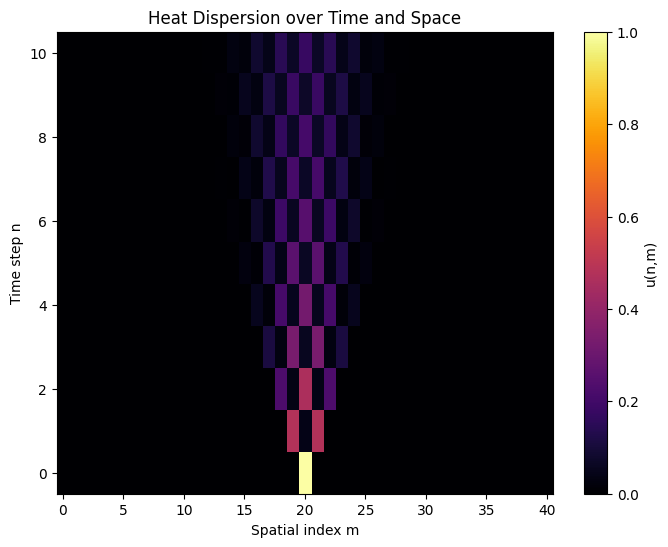

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def heat_ftcs(u0, c2, dx, dt, nt):
    """
    Solve u_t = c2 * u_xx on x ∈ [0,1] with homogeneous Dirichlet BCs (u=0 at x=0,1)
    using the explicit FTCS scheme.
    """
    Nx = len(u0) - 1
    r = c2 * dt / dx**2
    assert r <= 0.5, f"Stability condition violated: r={r:.3f} > 0.5"

    u = np.zeros((nt+1, Nx+1))
    u[0, :] = u0.copy()
    for n in range(nt):
        u[n+1, 1:Nx] = (
            u[n, 1:Nx]
            + r * (u[n, 2:Nx+1] - 2*u[n, 1:Nx] + u[n, 0:Nx-1])
        )
        u[n+1, 0] = 0
        u[n+1, Nx] = 0
    return u

if __name__ == "__main__":
    # Grid parameters
    Nx = 40
    dx = 1.0 / Nx
    dt = 0.0003
    c2 = 1.0
    nt = 10

    # Initial condition: spike at center
    u0 = np.zeros(Nx+1)
    u0[Nx//2] = 1.0

    # Solve
    sol = heat_ftcs(u0, c2, dx, dt, nt)

    # Plot as a heatmap
    plt.figure(figsize=(8,6))
    plt.imshow(sol, aspect='auto', origin='lower', cmap='inferno')
    plt.colorbar(label='u(n,m)')
    plt.xlabel('Spatial index m')
    plt.ylabel('Time step n')
    plt.title('Heat Dispersion over Time and Space')
    plt.show()
